In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
from PIL import Image
import csv

In [9]:
dataframe = pd.read_csv("./data/train.csv")
data_matrix = dataframe.to_numpy()
random.shuffle(data_matrix)

training_set = data_matrix[:, 1:]
training_labels = data_matrix[:, 0]

dataframe = pd.read_csv("./data/test.csv")
test_set = dataframe.to_numpy()

# Turns vector of 784 elements into 28 x 28 array
squished_training_set = [np.reshape(arr, (28, 28)) for arr in training_set]
squished_test_set = [np.reshape(arr, (28, 28)) for arr in test_set]


Dense neural network with sigmoid activation function

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(784),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_history = model.fit(training_set, training_labels, validation_split=0.2, epochs=30)

Convolutional neural network with ReLu activation and Adam optimizer

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_history = model.fit(np.stack(squished_training_set), training_labels, validation_split=0.2, epochs=18)

Epoch 1/18
1050/1050 [==============================] - 8s 7ms/step - loss: 0.6620 - accuracy: 0.8313 - val_loss: 0.2727 - val_accuracy: 0.9192
Epoch 2/18
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2139 - accuracy: 0.9365 - val_loss: 0.1687 - val_accuracy: 0.9502
Epoch 3/18
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1433 - accuracy: 0.9580 - val_loss: 0.1292 - val_accuracy: 0.9618
Epoch 4/18
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.1006 - val_accuracy: 0.9706
Epoch 5/18
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0857 - accuracy: 0.9748 - val_loss: 0.0897 - val_accuracy: 0.9732
Epoch 6/18
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0699 - accuracy: 0.9796 - val_loss: 0.0776 - val_accuracy: 0.9776
Epoch 7/18
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0592 - accuracy: 0.9823 - val_loss: 0.0672 - val_accuracy:

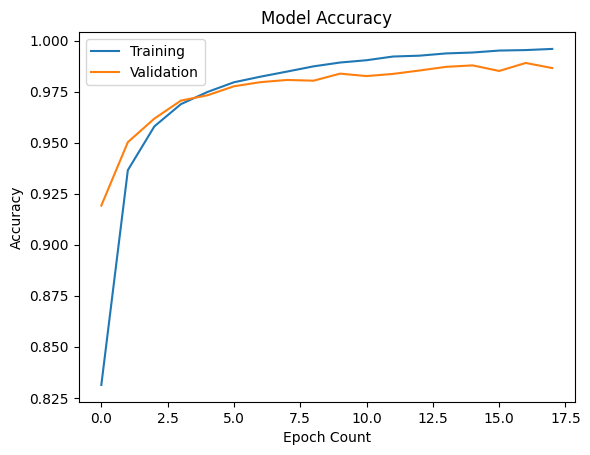

In [26]:
# Plot training metrics
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Count')
plt.legend(['Training', "Validation"], loc='upper left')
plt.show()

875/875 [==============================] - 2s 2ms/step
2 0 9 9 3 7 0 3 0 3 
5 7 4 0 4 3 3 1 9 0 
9 1 1 5 7 4 2 7 4 7 
7 5 4 2 6 2 5 5 1 6 
7 7 4 9 8 7 8 2 6 7 
6 8 8 3 8 2 1 2 2 5 
4 1 7 0 0 0 1 9 0 1 
6 5 8 8 2 8 9 9 2 3 
5 4 1 0 9 2 4 3 6 7 
2 0 6 6 1 4 3 9 7 4 


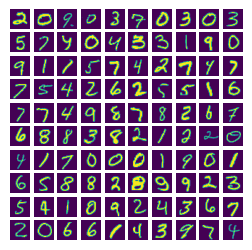

In [27]:
# Predictions on validation set
predictions_vector = model.predict(np.stack(squished_test_set))
predictions = [np.argmax(arr) for arr in predictions_vector]
# Display images and validation set results
ROWS = 10
COLS = 10

# Create subplot for display
fig, ax = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(3,3))
np.vectorize(lambda axis : axis.axis("off"))(ax) # Turn of axis labels

images = [Image.fromarray(arr.reshape((28, 28)).astype('uint8')) for arr in test_set]

# Display images
img_count = 0
for i in range(ROWS):
    for j in range(COLS):        
        if img_count < len(images):
            ax[i, j].imshow(images[img_count])
            img_count+=1

# Display predictions on validation set
value_count = 0
for i in range(ROWS):
    for j in range(COLS):
        if value_count < len(predictions):
            print(predictions[value_count], end=' ')
            value_count += 1
    print('')

# Output predictions to text file
with open("./predictions.csv", 'w') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(["ImageId", "Label"])
    for i in range(len(test_set)):
        csv_writer.writerow([str(i + 1), str(predictions[i])])
